In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(908, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [ ]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [12]:
df['year_of_capacity_data'].nunique()

1

In [13]:
df['name'].nunique()

908

In [14]:
df.drop(['name','url'],axis=1,inplace=True)

In [15]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [16]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [17]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [18]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [19]:
df.isnull().sum()

country                   0
country_long              0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [20]:
df['geolocation_source'].nunique()

3

In [21]:
df['country'].nunique()

1

In [22]:
df['country_long'].nunique()

1

In [23]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               908 non-null    object 
 1   capacity_mw             908 non-null    float64
 2   latitude                908 non-null    float64
 3   longitude               908 non-null    float64
 4   primary_fuel            908 non-null    object 
 5   commissioning_year      908 non-null    float64
 6   owner                   908 non-null    object 
 7   source                  908 non-null    object 
 8   geolocation_source      908 non-null    object 
 9   generation_gwh_2013     908 non-null    float64
 10  generation_gwh_2014     908 non-null    float64
 11  generation_gwh_2015     908 non-null    float64
 12  generation_gwh_2016     908 non-null    float64
 13  generation_gwh_2017     908 non-null    float64
 14  generation_data_source  908 non-null    ob

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

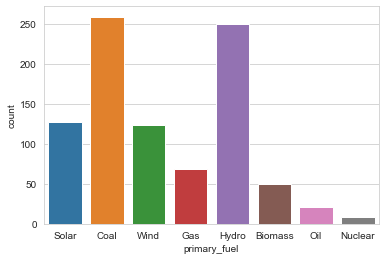

In [25]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

<AxesSubplot:>

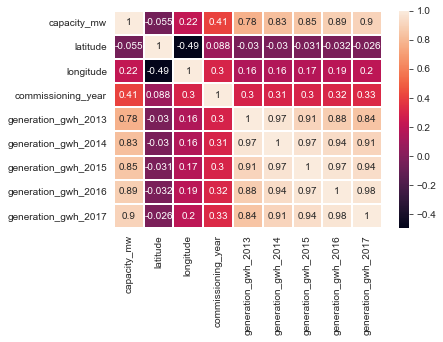

In [27]:
import matplotlib.pyplot as plt
dfcorr=df.corr()
sns.heatmap(dfcorr,annot=True, linewidth=1)

- Here we can notice generation_gwh_2013,...2014,....2015,...2016 ,...2017 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

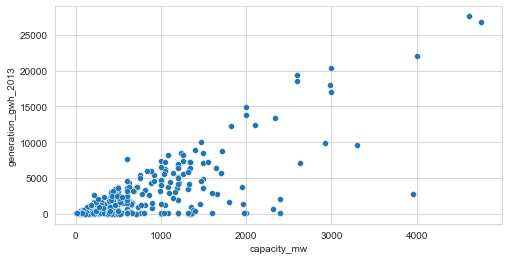

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

- we can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

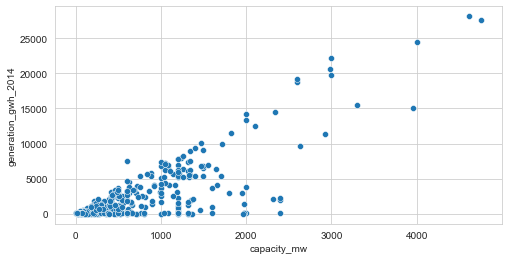

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

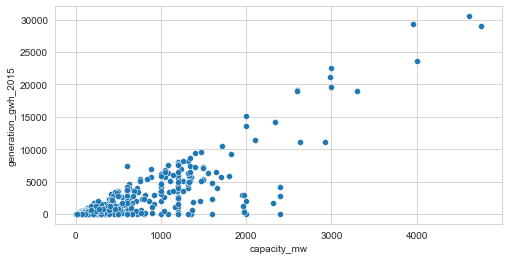

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

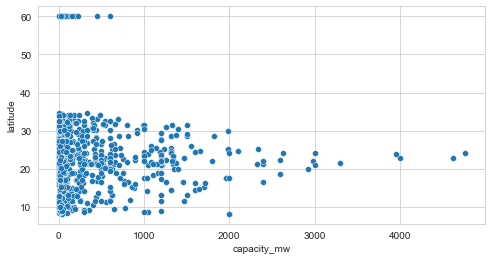

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

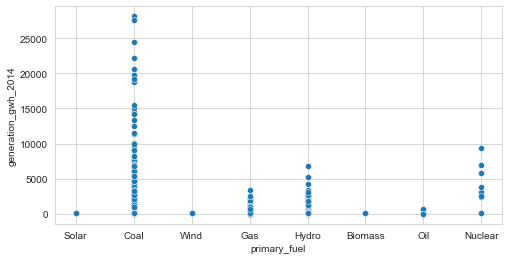

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

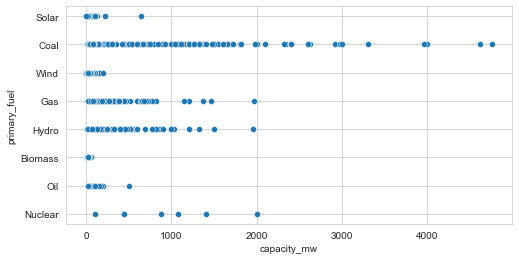

In [33]:

plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               908 non-null    object 
 1   capacity_mw             908 non-null    float64
 2   latitude                908 non-null    float64
 3   longitude               908 non-null    float64
 4   primary_fuel            908 non-null    object 
 5   commissioning_year      908 non-null    float64
 6   owner                   908 non-null    object 
 7   source                  908 non-null    object 
 8   geolocation_source      908 non-null    object 
 9   generation_gwh_2013     908 non-null    float64
 10  generation_gwh_2014     908 non-null    float64
 11  generation_gwh_2015     908 non-null    float64
 12  generation_gwh_2016     908 non-null    float64
 13  generation_gwh_2017     908 non-null    float64
 14  generation_data_source  908 non-null    ob

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [37]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [38]:

encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [39]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               908 non-null    object 
 1   capacity_mw             908 non-null    float64
 2   latitude                908 non-null    float64
 3   longitude               908 non-null    float64
 4   primary_fuel            908 non-null    int32  
 5   commissioning_year      908 non-null    float64
 6   owner                   908 non-null    object 
 7   source                  908 non-null    int32  
 8   geolocation_source      908 non-null    int32  
 9   generation_gwh_2013     908 non-null    float64
 10  generation_gwh_2014     908 non-null    float64
 11  generation_gwh_2015     908 non-null    float64
 12  generation_gwh_2016     908 non-null    float64
 13  generation_gwh_2017     908 non-null    float64
 14  generation_data_source  908 non-null    ob

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [42]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 15)
Shape of the dataframe after removing outliers:  (885, 15)
Percentage of data loss post outlier removal:  2.5330396475770924


In [43]:
df.shape

(885, 15)

ValueError: could not convert string to float: 'WRI1020239'

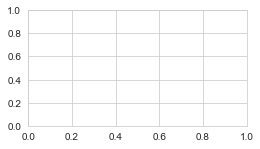

In [47]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]])

In [48]:
df.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform

df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [50]:
df.skew()

capacity_mw            0.014952
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.034887
generation_gwh_2014   -0.014669
generation_gwh_2015   -0.012333
generation_gwh_2016   -0.009262
generation_gwh_2017   -0.005003
dtype: float64

In [70]:
x=df.drop(['capacity_mw','gppd_idnr','owner','generation_data_source'],axis=1)
y=df['capacity_mw']

In [71]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.0,109,1,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
1,24.7663,74.6090,1,60.0,174,2,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
2,21.9038,69.3732,7,60.0,21,2,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
3,23.8712,91.3602,2,2004.0,22,2,0.870681,0.804080,0.942469,0.933082,0.755537
4,21.9603,82.4091,1,2015.0,22,2,1.385431,1.630555,1.923335,1.911582,1.802226
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.0,22,2,-0.471309,-0.460040,-2.423657,0.243403,0.889674
904,12.8932,78.1654,6,60.0,77,0,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
905,15.2758,75.5811,7,60.0,21,2,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
906,24.3500,73.7477,1,60.0,59,2,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528


In [72]:
y

0     -1.689076
1      0.240873
2     -0.262967
3      0.415568
4      1.784019
         ...   
903    1.723664
904   -1.608681
905   -0.499995
906    0.129719
907   -0.738602
Name: capacity_mw, Length: 885, dtype: float64

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [76]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.591291,0.568494,0.568932,0.566561,0.565028
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.183883,0.196731,0.200379,0.202994,0.210328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.710270,0.700391,0.703337,0.699987,0.703190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [78]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6033793987661354
At random state 0, The test accuracy is: 0.6216727027615341


At random state 1, The training accuracy is: 0.6083279878933308
At random state 1, The test accuracy is: 0.6022223138115208


At random state 2, The training accuracy is: 0.6353782409904477
At random state 2, The test accuracy is: 0.4688289866613957


At random state 3, The training accuracy is: 0.6102288217663278
At random state 3, The test accuracy is: 0.5919635215348062


At random state 4, The training accuracy is: 0.6088027364078052
At random state 4, The test accuracy is: 0.5962173327956521


At random state 5, The training accuracy is: 0.620339909413044
At random state 5, The test accuracy is: 0.5423848089457907


At random state 6, The training accuracy is: 0.6179931752699392
At random state 6, The test accuracy is: 0.5442706774717503


At random state 7, The training accuracy is: 0.6162228512356386
At random state 7, The test accuracy is: 0.557057958233

In [79]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [80]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5864596104267872


In [81]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3678555845581378
MAE: 0.483007805055114
r2_score: 0.36638342580206373


In [82]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5863280068229355


In [83]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3674881298516644
MAE: 0.4840962934912547
r2_score: 0.35881863372023226


In [84]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5456748672496724


In [85]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.3883396187656028
MAE: 0.4420249811706944
r2_score: 0.4679625216734743


In [86]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9595744790485983


In [87]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.1518038650839265
MAE: 0.2833924354979511
r2_score: 0.8142134324656003


In [88]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9906753612727366


In [91]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.31095628599700365
MAE: 0.40857732843126937
r2_score: 0.6802730395089072


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8802104166754463


In [93]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.15011438080878237
MAE: 0.2972485076823141
r2_score: 0.8110865292821045


#### cross validation

In [94]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.405445, 0.062499
R    : 0.404019, 0.062006
svr    : 0.446500, 0.076536
svr_p    : 0.249986, 0.053431
svr_r    : 0.231048, 0.063926
RF    : 0.210123, 0.060015
DTR    : 0.323198, 0.093622
GBR    : 0.204018, 0.063639


### HYPER PARAMETER TUNING:

GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

With GradientBoostingRegressor

In [96]:

GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [97]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [98]:

GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [99]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [100]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.14974867353848836
MAE: 0.2832464034168786
r2_score: 0.8183521327479188


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

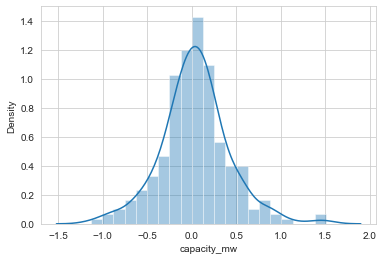

In [101]:
sns.distplot(GF_grid_pred-y_test)

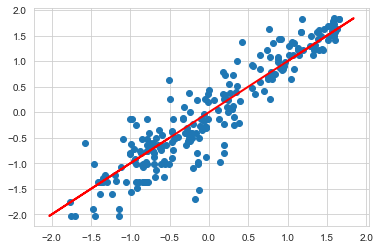

In [102]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

### saving the model

In [103]:
import joblib
joblib.dump(GF_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']